In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
from xgboost import XGBClassifier
from sklearn import metrics
from scipy.spatial.distance import cdist

crime_df = pd.read_csv("USArrests.csv")
crime_df.head(50)

C:\Users\jedwa\AppData\Local\Temp\ipykernel_2192\2597385745.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


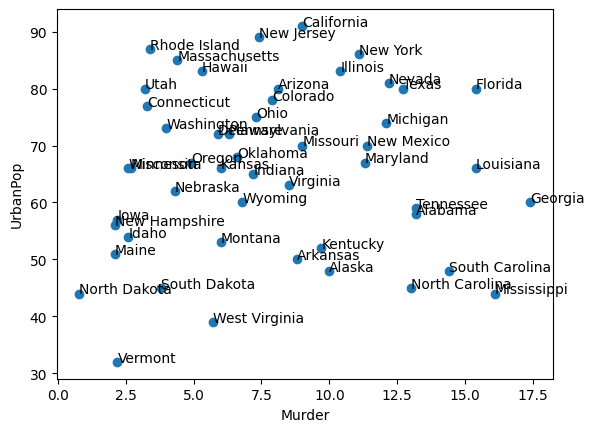

In [24]:
# Clustering
from sklearn.cluster import KMeans
X = crime_df.drop('State',axis = 1)
y = crime_df['State']
plt.scatter(X['Murder'],X['UrbanPop'])
# enumerating allows you to keep track 
# of the index associated with each iteration
for i, txt in enumerate(y):
    plt.annotate(txt, (X['Murder'][i],X['UrbanPop'][i]))
plt.xlabel('Murder')
plt.ylabel('UrbanPop')
plt.show()

In [29]:
inertias = []
distortions = []

for k in range(1,10):
    # build and fit the model
    model = KMeans(n_clusters=k).fit(X)

    # Distortion is the average of the squared
    # Distance from the cluster cdnter
    # to the data points in Euclidean space
    # Euclidean space = standard 2+ dimensional space
    distortion = sum(np.min(cdist(X, model.cluster_centers_,'euclidean'),axis=1))/X.shape[0]
    distortions.append(distortion)

    # a good model is one with low inertia or distortion and a low number of clusters
    inertia = model.inertia_
    inertias.append(inertia)

Text(0.5, 1.0, 'Elbow method')

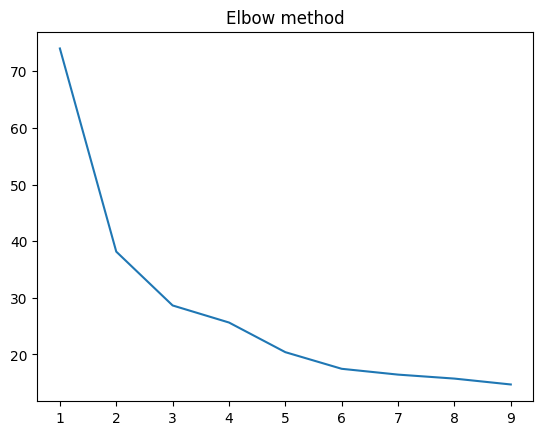

In [30]:
plt.plot(range(1,10),distortions)
plt.title('Elbow method')

Text(0.5, 1.0, 'Elbow Method With Inertia')

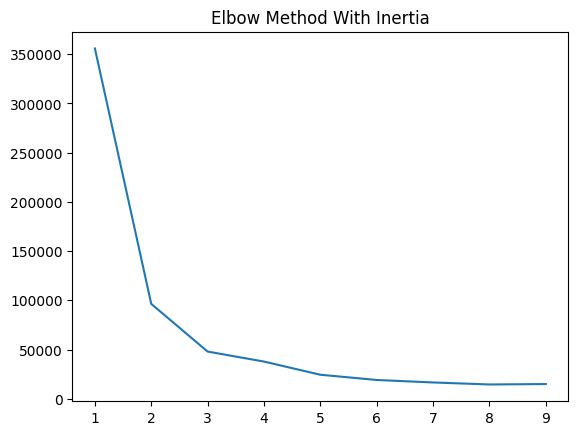

In [32]:
plt.plot(range(1,10),inertias)
plt.title('Elbow Method With Inertia')

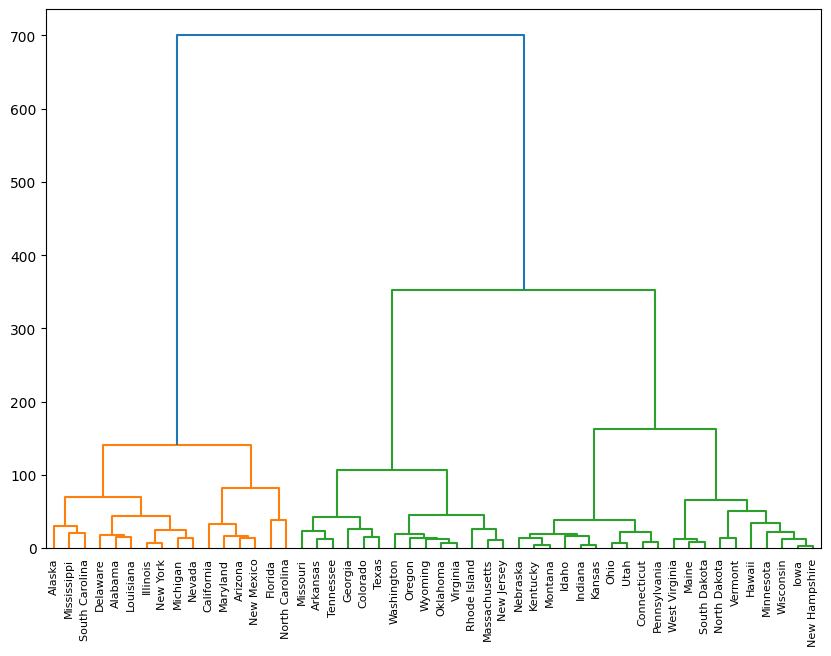

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X,'ward')
plt.figure(figsize=(10,7))
dendro = dendrogram(linked, labels=list(y))

In [41]:
from sklearn.cluster import AgglomerativeClustering
# divides the population into several clusters such that the data points
# in the same cluster are more similar to eaach other and the data points in 
# different clusters are more dissimiliar 
cluster = AgglomerativeClustering(n_clusters=3,linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2], dtype=int64)

In [47]:
plt.figure(figsize = (10,10))
plt.scatter(X['UrbanPop'],X['Murder'], c =cluster.labels_)
for i, txt in enumerate(y):
    plt.annotate(txt, (X['UrbanPop'],X['Murder']))
plt.show() 

TypeError: cannot convert the series to <class 'float'>

<Figure size 1000x1000 with 1 Axes>

In [10]:
def mean_nums(numbers: list) -> int:
    '''takes the average of the three numbers'''
    total = 0
    amount = 0
    for x in numbers:
        total+=x
        amount+=1
    print("The average is: ",(total/amount))
number_list = [10,15,20,25,30,35]
mean_nums(number_list)

The average is:  22.5


# Dimensionality Reduction

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [55]:
X = diabetes_df.drop('Outcome',axis = 1)
y=diabetes_df['Outcome']
#train test split - cross validation
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 32,stratify = y)

model = LogisticRegression(random_state=32).fit(X_train,y_train)
y_predicted = model.predict(X_test)

C:\Users\jedwa\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


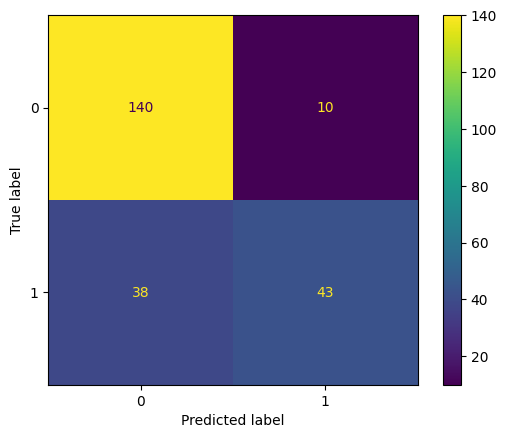

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [61]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 4)
# singular value decomposition = factorization technique for real or complex numbers
#in a matrix

X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.fit_transform(X_test)

model = LogisticRegression(random_state = 32).fit(X_train_svd,y_train)


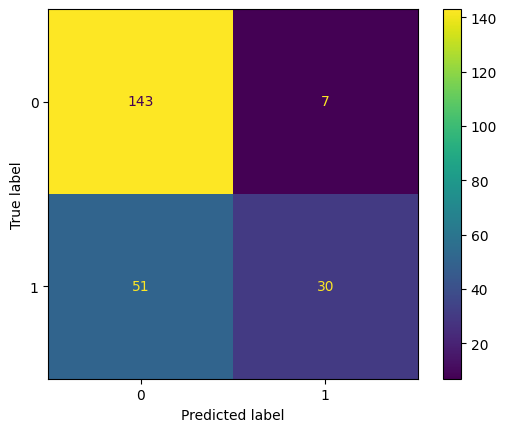

In [62]:
ConfusionMatrixDisplay.from_estimator(model,X_test_svd,y_test)